#### Project: Analysis of the PlantGrowth R dataset 

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Load the dataset from URL
url = "PlantGrowth.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [32]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


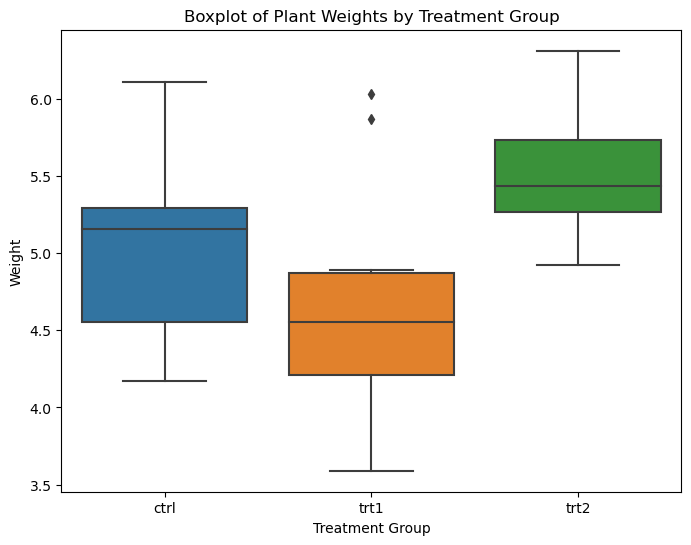

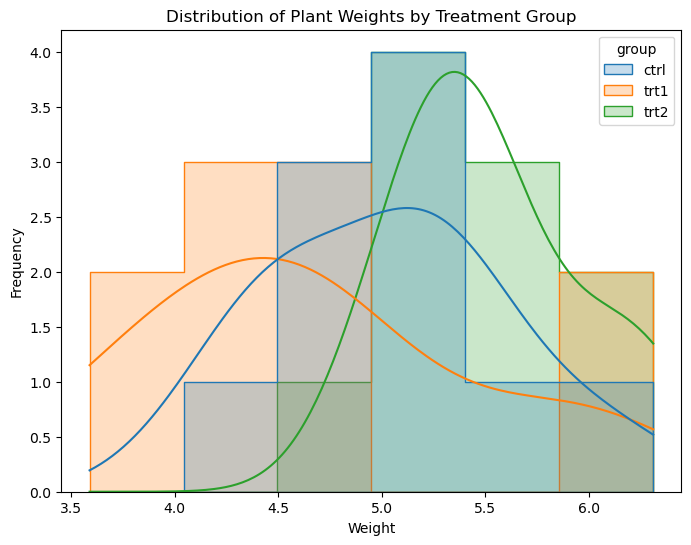

In [33]:
# Boxplot of weight across groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=data)
plt.title('Boxplot of Plant Weights by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.show()

# Distribution plot for each group
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="weight", hue="group", kde=True, element="step")
plt.title('Distribution of Plant Weights by Treatment Group')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()